<a href="https://colab.research.google.com/github/NishatVasker/Bank-Account/blob/main/Fedding_Nation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [2]:
from google.colab import files
uploaded = files.upload()


Saving kaggle (1).json to kaggle (1).json


In [6]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!kaggle datasets download -d nafishamoin/bangladeshi-crops-disease-dataset


100% 6.43G/6.45G [01:17<00:00, 124MB/s]
100% 6.45G/6.45G [01:17<00:00, 89.8MB/s]


In [ ]:
!unzip bangladeshi-crops-disease-dataset.zip


In [9]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.applications import MobileNetV2

In [10]:
dir = '/content/CropDisease/Crop___DIsease'
labels = os.listdir(dir)
labels

['Potato___Healthy',
 'Corn___Healthy',
 'Wheat___Healthy',
 'Potato___Late_Blight',
 'Rice___Leaf_Blast',
 'Wheat___Brown_Rust',
 'Rice___Healthy',
 'Corn___Gray_Leaf_Spot',
 'Potato___Early_Blight',
 'Rice___Brown_Spot',
 'Wheat___Yellow_Rust',
 'Corn___Common_Rust',
 'Invalid',
 'Corn___Leaf_Blight',
 'Rice___Hispa']

In [11]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

Potato___Healthy 2006
Corn___Healthy 3718
Wheat___Healthy 1497
Potato___Late_Blight 3131
Rice___Leaf_Blast 1182
Wheat___Brown_Rust 1128
Rice___Healthy 523
Corn___Gray_Leaf_Spot 3284
Potato___Early_Blight 3149
Rice___Brown_Spot 563
Wheat___Yellow_Rust 1156
Corn___Common_Rust 3814
Invalid 1563
Corn___Leaf_Blight 3816
Rice___Hispa 523


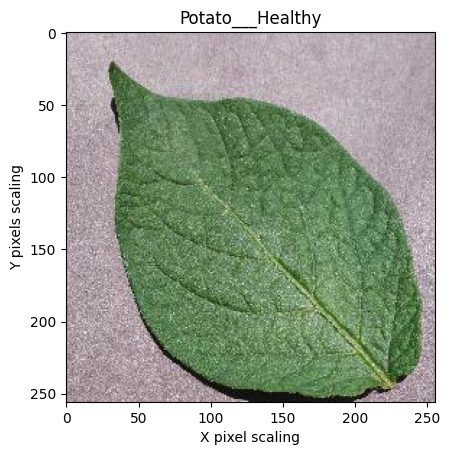

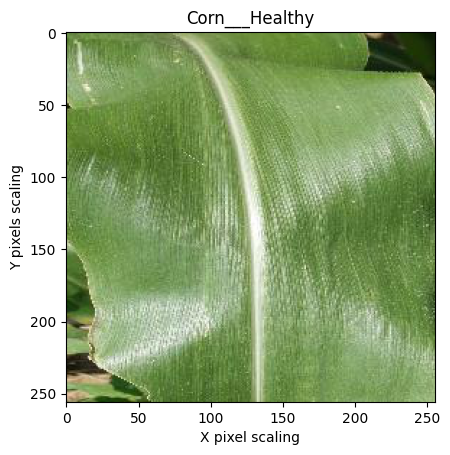

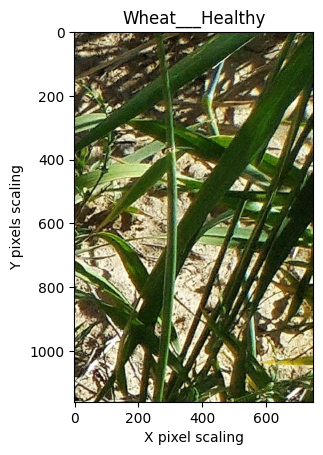

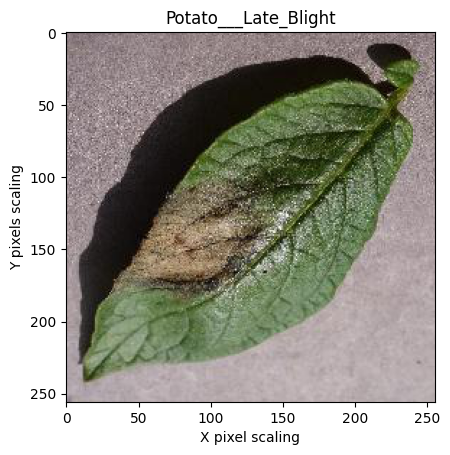

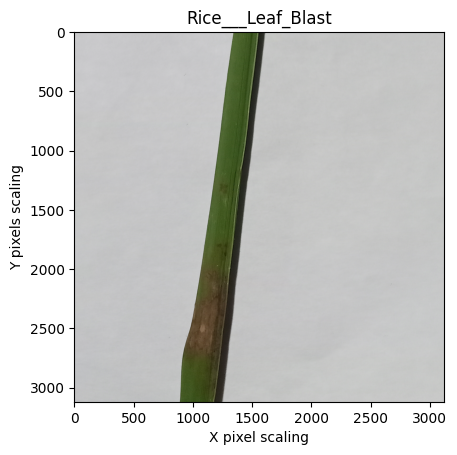

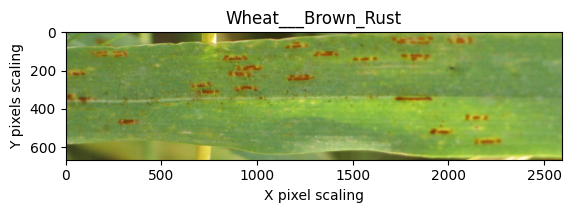

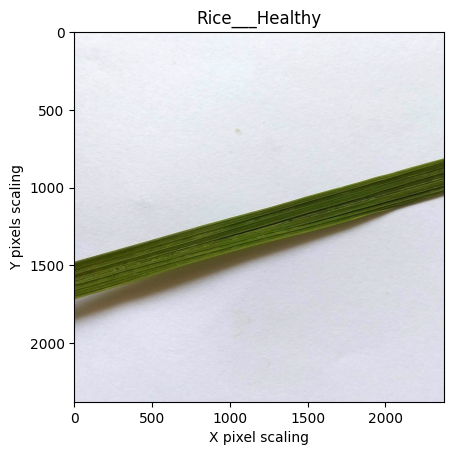

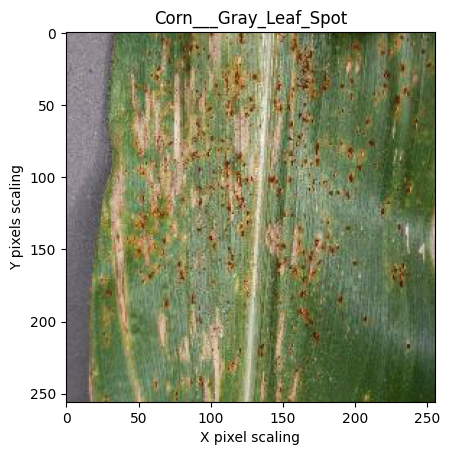

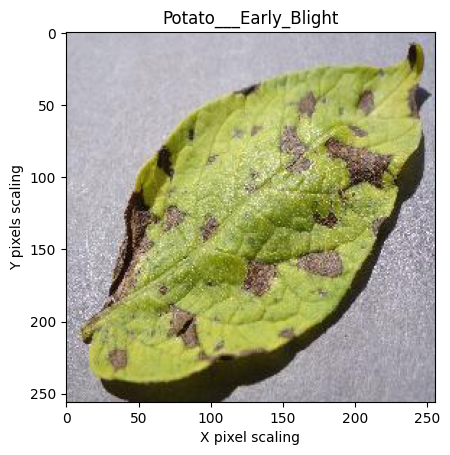

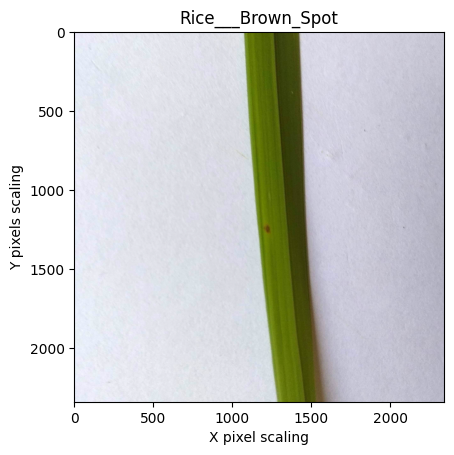

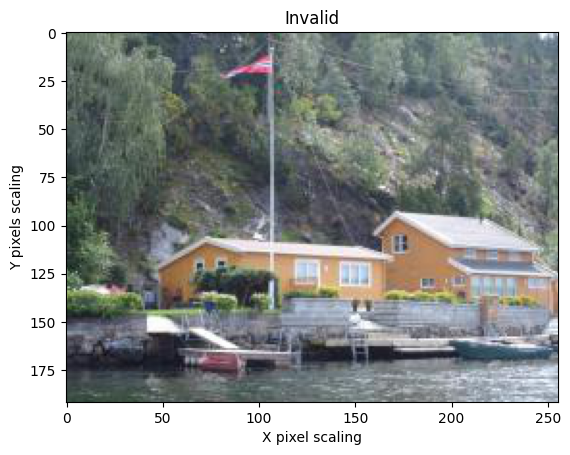

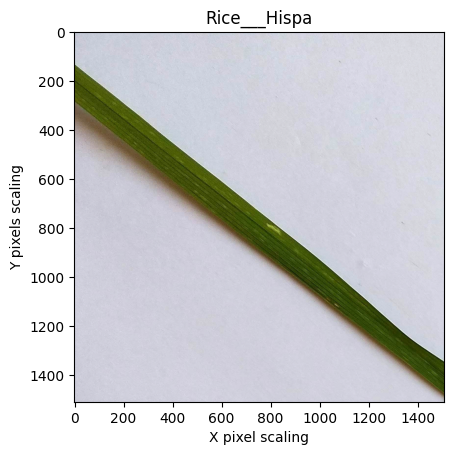

In [12]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [13]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.20
)

train_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
test_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)
validation_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)

Found 24850 images belonging to 15 classes.
Found 6203 images belonging to 15 classes.
Found 6203 images belonging to 15 classes.


In [14]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

Found 31053 images belonging to 15 classes.


In [ ]:
model=Sequential()
size=(64,64,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(15, activation='softmax'))##class number,in example i have 8 classes so i have given 15

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
base_model = model.fit(train_data, steps_per_epoch=len(train_data), epochs=2, validation_data=validation_data, validation_steps=len(validation_data))


Epoch 1/2
777/777 [==============================] - 695s 893ms/step - loss: 0.9735 - accuracy: 0.6626 - val_loss: 0.7211 - val_accuracy: 0.7658
Epoch 2/2
725/777 [==========================>...] - ETA: 35s - loss: 0.4576 - accuracy: 0.8362

In [ ]:
print(base_model.history.keys())

In [20]:
acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: ignored